**عنوان و هدف پروژه**

<p dir=rtl>
هدف از انجام این پروژه آشنایی با Hidden Markov Models است که در قالب کار با داده های صوتی و آموزش مدل ها بوسیله این داده ها انجام می شود.</p>

**توضیح کلی پروژه و تعریف صورت مسئله**


<p dir=rtl>
در این پروژه ما با تعداد زیادی داده صوتی رو به رو هستیم که باید در ابتدا روی آنها یکسری پیش پردازش انجام دهیم، سپس بر اساس یک ویژگی که از آنها استخراج میکنیم، از آنها در آموزش مدل های مخفی مارکوفی که داریم استفاده کنیم. در نهایت با استفاده از یکسری از همین نمونه ها که در بخش آموزش از آنها استفاده ای نکردیم مدل هایی که می سازیم را تست کنیم و دقت آنها را اندازه بگیریم.
</p>

**دیتا های لود شده**


<p dir=rtl>
در این قسمت ما از داده های موجود در فایل recordings استفاده کردیم که در آن تعدادی فایل صوتی (.wav) وجود دارد.
</p>

In [ ]:
import librosa
import numpy as np
import os
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**پاسخ سوالات مربوط به پیش پردازش و استخراج ویژگی**

1)Yes-it can be useful for this dataset because:
* **Speaker Variability**: Since you have multiple samples for each speaker, segmentation can help in isolating individual spoken digits within each recording. This can help in capturing the variability in speech patterns among different speakers more effectively. By segmenting the recordings into individual digit utterances, you can train more speaker-specific HMM models, which may improve recognition accuracy.

* **Modeling Temporal Dynamics**: HMMs are powerful models for capturing temporal dependencies in sequential data. Segmenting the recordings into individual digits allows you to model the temporal dynamics of speech more accurately. Each segment can then be modeled as a sequence of acoustic features, and the transition probabilities between different states within the HMM can capture the temporal transitions between phonemes or sub-word units.

* **Improved Generalization**: By segmenting the dataset into individual digit utterances, you can potentially improve the generalization ability of your HMM models. Instead of modeling entire recordings with varying lengths and contexts, you're focusing on modeling individual digits, which might share more consistent acoustic properties across different speakers.

* **Simplified Modeling**: Segmentation can simplify the modeling process by breaking down the complex task of recognizing whole recordings into smaller, more manageable units. This can lead to more interpretable and modular HMM models, where each model is trained specifically for recognizing a single digit.

===================================================================

2)
 * **mfcc:** <p dir=rtl>در واقع دراستخراج این ویژگی اتفاقی که صورت می گیرد این است که صوت خام با استفاده از تبدیل فوریه و استفاده از مقیاس mel به حوزه فرکانس تبدیل می شود که اینکار برای تقریب درک شنوایی انسان از فرکانس صدا است. mfcc ها مفید هستند زبرا بر ویژگی های سیگنال صوتی که برای درک گفتار انسان مهم هستند تاکید می کنند و اطلاعاتی که ارتباط کمتری به این موضوع دارند را دور می ریزند.این ویژگی ها باعث می شود که از mfcc برای کارهایی مثل تشخیص سخنران، تشخیص احساسات و تبدیل گفتار به متن استفاده شود.
</p>

* **Zero Crossing Rate:** <p dir=rtl>این ویژگی می تواند برای قطعه بندی مناسب باشد.(مانند واج یا هجا) زیرا به شناسایی مرزهای بین صداهای مختلف بر اساس ویژگی دامنه آنها کمک می کند.
به طور کلی یک ویژگی ساده و در عین حال موثر برای گرفتن جنبه های خاصی از ساختار زمانی و تناوب سیگنال های گفتار عمل می کندکه می تواند برای کاربرد های مختلفی از جمله تشخیص گفتار ارزشمند باشد.
تعریف آن نیز این است که در آن، سیگنال از مثبت به صفر و به از صفر به منفی، یا از منفی به صفر و از صفر به مثبت می رود که یک ویژگی کلیدی برای طبقه بندی صداهای ضربی است.
در واقع در یک الگوریتم اصلی تشخیص گام که تعیین می کند گفتار انسان در یک بخش صوتی وجود دارد یا نه از Zero Crossing Rate استفاده می شود.
</p>

* **mel_spectogram:**<p dir=rtl>نمایش بصری از محتوای فرکانسی یک سیگنال صوتی در طول زمان با استفاده از مقیاس mel است.در واقع وقتی مقیاس mel روی spectogram اعمال می شود یک مقیاس از فرکانس ها با تقریب پاسخ سیستم شنوایی انسان به فرکانس مختلف است.برای محاسبه این ویژگی، ابتدا سیگنال صوتی به چندین قسمت کوتاه با همپوشانی تقسیم می شوند و روی هر کدام، تبدیل فوریه برای بدست آوردن طیف بزرگی استفاده می شود سپس به مقیاس mel می روند و با استفاده از یک بانک،فیلتر می شود که شامل مجموعه ای از فیلتر های مثلثی با فاصله یکنواخت در مقیاس mel هستند.
برای بصری سازی، در یک تصویر دو بعدی نسان داده می شود که زمان در محور افقی، فرکانس در محور عمودی و شدت هر جز فرکانسی با رنگ(روشنایی پیکسل مربوطه) نمایش داده می شود بطوریکه روشن انرژی بیشتر و تیره انرژی کمتر را نشان می دهد.
یطور کلی mel_spectogram نمایش فشرده ولی با اطلاعاتی خوب از نمحتوای یک سیگنال   صوتی است به شیوه ای که با ادراک شنوایی انسان همخوانی دارد و برای کاربرد هایی نظیر تشخیص گفتار و صوت مفید است.
</p>

* **chroma_features:**<p dir=rtl>یک توصیفگر است که محتوای آهنگی سیگنال صوتی موصیقی را به صورت فشرده تر بیان می کند. می توان از آن بعنوان پیش نیازی مهم برای تحلیل معنایی سطح بالا مانند تشخیص آکورد، یا تخمین تشابه هارمونیک در نظر گرفت.
برای محاسبه این ویژگی ، سیگنال صوتی به بخش های کوتاه تقسیم می شود و محتوای هر بخش با استفاده از تکنیک هایی مانند تبدیل فوریه تجزیه می شود و در ادامه پس از فرایند های دیگری محاسبه می شود.
</p>

===================================================================

3)<p dir=rtl>
رنگ های نشان داده شده در heatmap در هر پیکسل، حساسیت و میزان robustness را نشان می دهند.بطوری که مقادیر بالاتر می توانند با رنگ های گرم تر مانند(قرمز ) و مقادیر پایین تر با رنگ های سردتر(آبی) نمایش داده شوند که با توجه به heatmapهای کشیده شده در پایین این تغییرات در رنگ ها را مشاهده می کنیم.
</p>

===================================================================

4)Yes-there are scenarios where their effectiveness might be diminished:

* **Background Noise:** Presence of background noise in the audio signal can reduce the effectiveness of MFCCs as it may obscure useful information or introduce ambiguity in the feature space.

* **Environmental Variations:** In conditions where the recording environment or conditions vary significantly, MFCCs may be less effective. Variations in lighting conditions, ambient noise levels, or other environmental factors can cause significant changes in MFCCs, affecting the performance of models relying on them.

* **Presence of Extreme Frequencies:** In some cases, MFCCs may lose information related to very high or very low frequencies in the audio signal, particularly if the settings for MFCC extraction are not appropriately tuned.

* **Pronunciation Variations:** Variations in pronunciation or individual differences can pose challenges for models based on MFCCs, as similar patterns in the feature space may become less distinguishable.

=====================================================================

5)<p dir=rtl>این همپوشانی از آن جهت استفاده می‌شود که اطمینان حاصل شود هیچ اطلاعات مهمی در اطراف مرزهای زمانی فریم‌ها از دست نرود. با داشتن همپوشانی، هر بخش از سیگنال صوتی در بیش از یک فریم مورد بررسی قرار می‌گیرد، که این امر می‌تواند باعث افزایش دقت در استخراج ویژگی‌ها مانند MFCCs شود.
</p>

<p dir=rtl>
برای مثال، در استخراج MFCCs، معمولاً فریم‌های زمانی با اندازه 25 میلی‌ثانیه و با یک پنجره 10 میلی‌ثانیه‌ای که به طور معمول با 50% همپوشانی استفاده می‌شود. به این معنا که هر فریم جدید با اندازه 25 میلی‌ثانیه، از 10 میلی‌ثانیه قبلی آغاز می‌شود، به این ترتیب 50% از اطلاعات هر بخش از سیگنال در هر فریم جدید بازنشر می‌شود.
</p>

=====================================================================

6)It has several reason:

  *  **Dimensionality Reduction:** Employing a limited number of MFCC coefficients helps reduce the dimensionality of features, which can improve training speed and decrease model complexity in machine learning models. Additionally, reducing feature dimensionality can assist models in cases where training data is limited and help prevent overfitting.
  * **Relevance of Initial Coefficients:** The spectrum of MFCC coefficients provides crucial information about various characteristics of audio signals. However, this information typically concentrates in the initial MFCC coefficients (from coefficient 1 to coefficient 12 or 13). Therefore, using fewer coefficients may be recommended to retain important information while reducing unnecessary data.
  * **Computational Efficiency:** Calculating MFCC coefficients requires processing frequency and time-domain signals, which can be computationally expensive for large signals or real-time processing applications. Using a limited number of coefficients can reduce computational costs.
  * **Compliance with Standards**: Some audio standards and formats may impose limitations on the number of MFCC coefficients. In such cases, using a limited number of coefficients ensures compatibility with these standards.




*   NUM_DIGITS -> تعداد ارقام موجود

*   NUM_TRAIN_SAMPLES -> تعداد نمونه هایی که برای یادگیری مدل هایمان از آنها استفاده میکنیم(مربوط به مدل های بر اساس رقم)

*  NUM_MAX_SAMPLE -> تعداد کل نمونه های موجود(مربوط به مدل های بر اساس رقم)

*  NUM_TRAIN_SAMPLES_SPEAKERS -> تعداد نمونه هایی که برای یادگیری مدل هایمان از آنها استفاده میکنیم(مربوط به مدل های بر اساس گوینده)

*  NUM_MAX_SAMPLE_SPEAKERS -> تعداد کل نمونه های موجود(مربوط به مدل های بر اساس گوینده)

*  NUM_HIDDEN_STATES -> تعداد حالات مخفی

In [ ]:
#hyper_parameters
NUM_DIGITS = 10
NUM_TRAIN_SAMPLES = 260
NUM_MAX_SAMPLE = 300
NUM_HIDDEN_STATES = 8
NUM_TRAIN_SAMPLES_SPEAKERS = 420
NUM_MAX_SAMPLE_SPEAKERS = 500

First, I load my (.wav) files and extract mfccs from them, then for each file, I seperate speaker_name, digit_label, number of speaking and mfcc from the file and make an element of all_samples_by_mfcc dictionary, after that I have a dictionary that has an element for each (.wav) file that includes(speaker_name, digit_label, number of speaking and mfcc)

In process of extracting mfccs, I delete noise from my files as a part of preprocessing.

In [ ]:
#data_pre_processing
samples_add = '/content/drive/My Drive/recordings/'
TOP_DB = 40
def prepare_dict_element_of_file_name(file):
  name_sep = file.split('_')
  digit = name_sep[0]
  name = name_sep[1]
  index = name_sep[2][:-4]

  return {'digit' : digit, 'name' : name, 'index' : index}

def calculate_mfcc_and_add_to_sample_dict(sample_dict, file):
    file_path = os.path.join(samples_add, file)

    y, sr = librosa.load(file_path, sr=None)
    y_denoised = librosa.effects.preemphasis(y)
    # extract_mfcc
    mfcc = librosa.feature.mfcc(y=y_denoised, sr=sr, n_mfcc=13)
    # mfcc = librosa.util.normalize(mfcc)
    sample_dict['mfcc'] = mfcc
    sample_dict['y'] = y_denoised
    sample_dict['sr'] = sr

    return sample_dict



#pre_proccessing_and_calculate_mmfcc
all_samples_by_mfcc = []
for file_name in os.listdir(samples_add):
  temp_dict = prepare_dict_element_of_file_name(file_name)
  updated_temp_dict = calculate_mfcc_and_add_to_sample_dict(temp_dict, file_name)
  all_samples_by_mfcc.append(updated_temp_dict)

data_frame = pd.DataFrame(all_samples_by_mfcc)

After extracting mfccs and making the following dictionary I made a datafream of it and here I displayed it.

In [ ]:
#display the data_frame
data_frame

,digit,name,index,mfcc,y,sr
0,6,theo,29,"[[-1072.6842, -1072.6842, -1072.6842, -1072.68...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025
1,6,nicolas,8,"[[-895.5191, -895.5191, -895.5191, -895.5191, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025
2,6,theo,28,"[[-795.77997, -795.77997, -795.77997, -795.779...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025
3,6,theo,2,"[[-1079.0298, -1079.0298, -1079.0298, -1079.02...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025
4,6,theo,31,"[[-1097.8646, -1097.8646, -1097.8646, -1097.86...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025
...,...,...,...,...,...,...
3014,0,george,14 (1),"[[-804.1188, -804.1188, -804.1188, -804.1188, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025
3015,0,george,13,"[[-758.95306, -758.95306, -758.95306, -758.953...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025
3016,0,george,15 (1),"[[-766.22577, -766.22577, -766.22577, -766.225...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025
3017,0,george,11 (1),"[[-817.7129, -817.7129, -817.7129, -817.7129, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11025


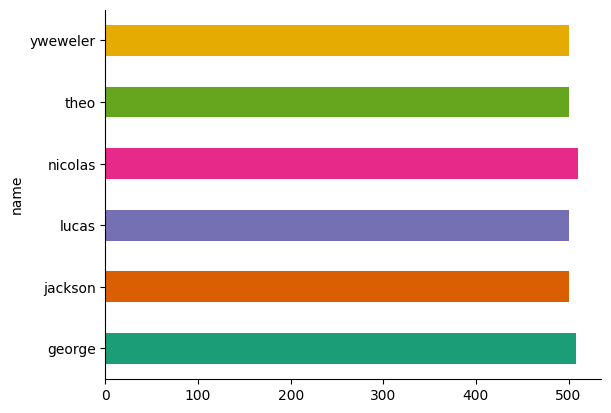

In [ ]:
# @title name

from matplotlib import pyplot as plt
import seaborn as sns
data_frame.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In this section, I categorized the items according to digit_label in different groups (from 0 to 9)

In other words, I made a main list that has as many digit labels as sublists.In a loop I extract digit of each element of the (all_samples_by_mfcc) dictionary and according to that, I append the element to the proper sublists and finally I divide all samples into groups based on their digit-label.

In [ ]:
grouped_by_digit_label = [[] for _ in range(NUM_DIGITS)]
for item in all_samples_by_mfcc:
  digit = item['digit']
  grouped_by_digit_label[int(digit)].append(item)

In this section, I displayed heat-maps of 8th element of each group using matplotlib library and its functions.

0


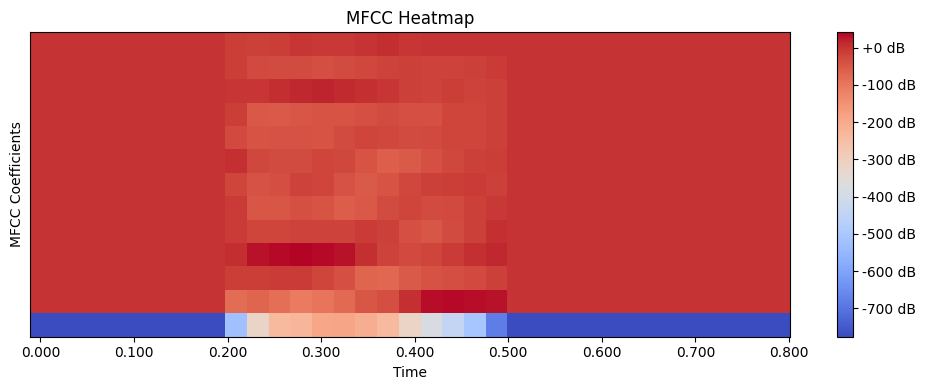

1


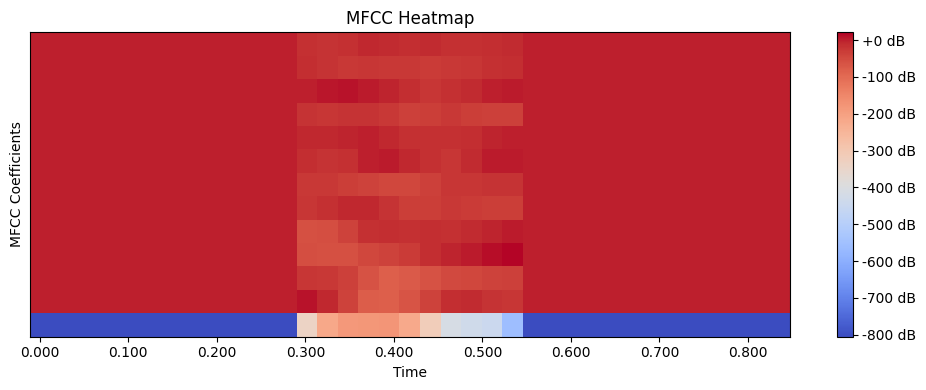

2


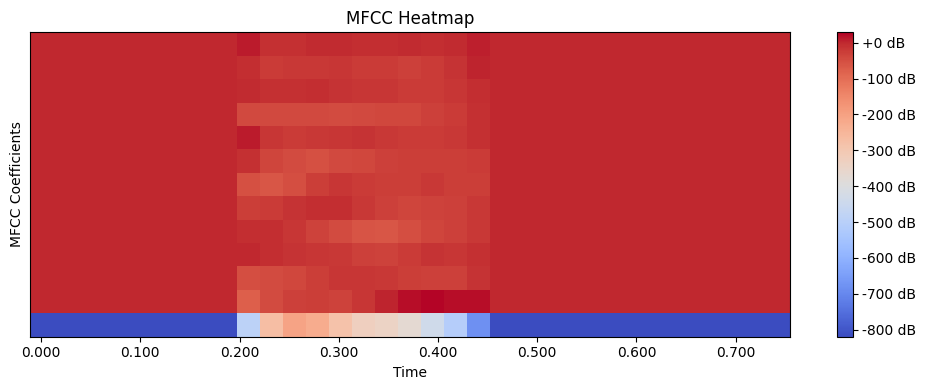

3


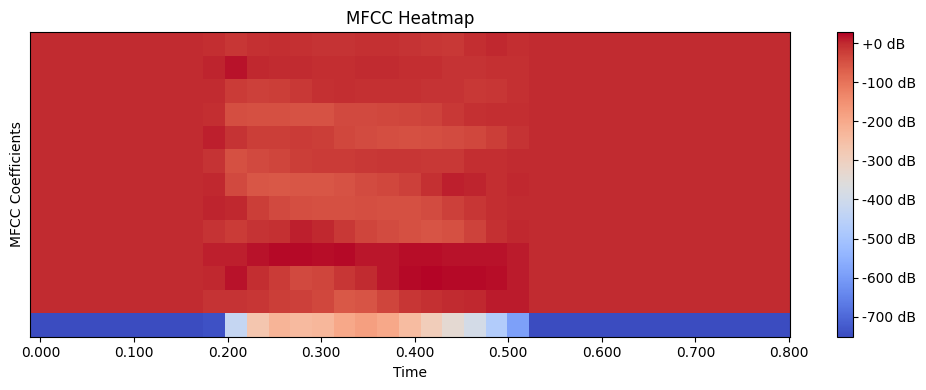

4


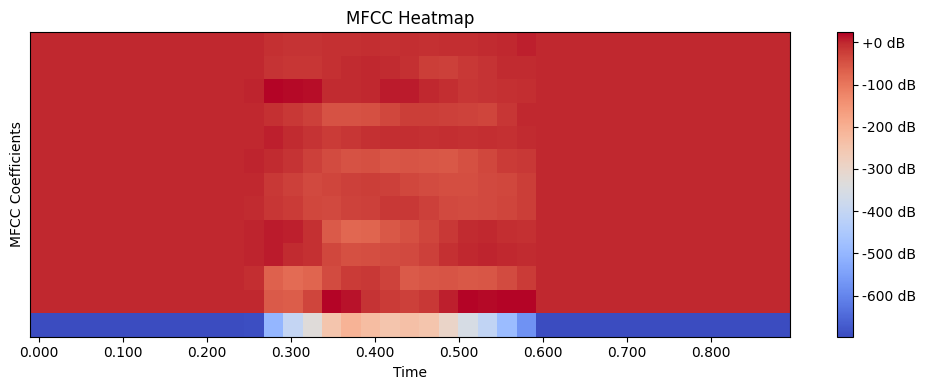

5


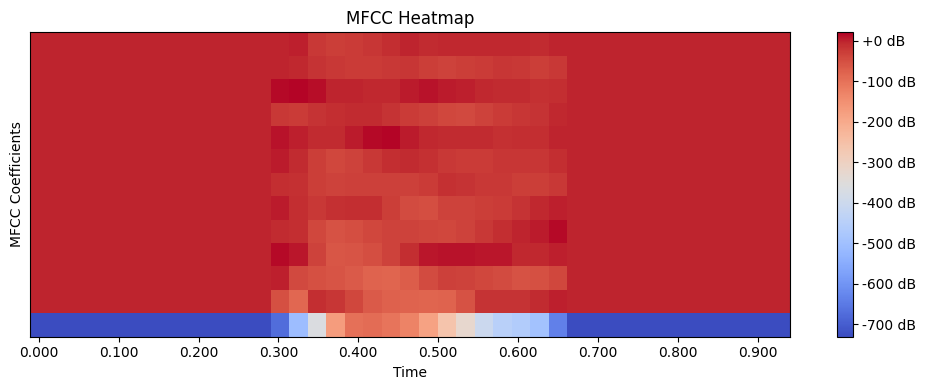

6


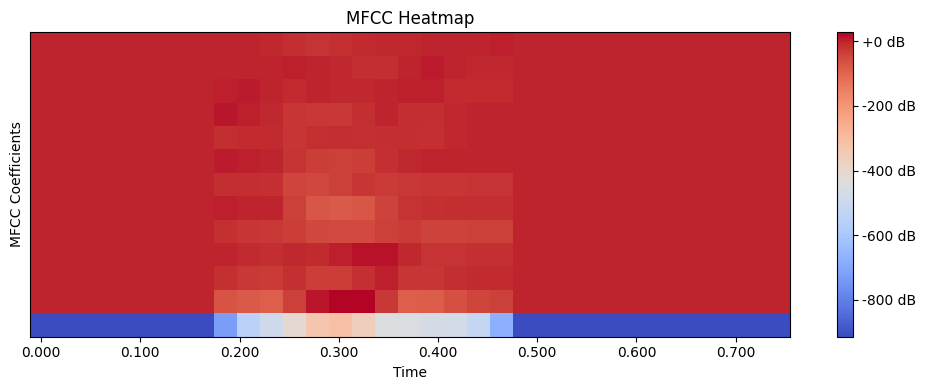

7


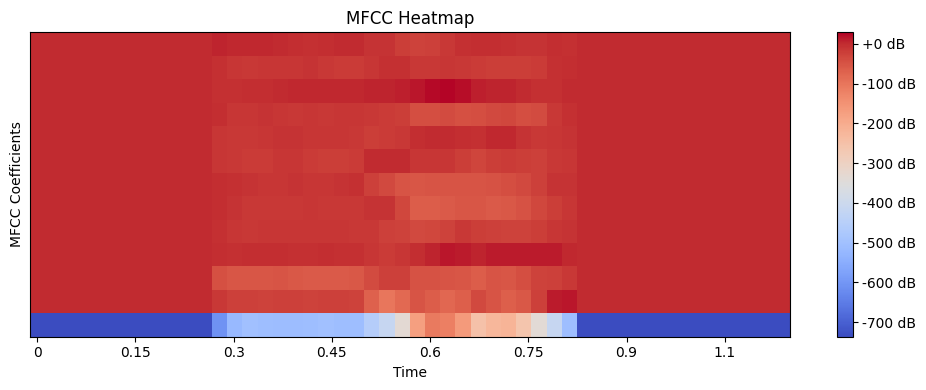

8


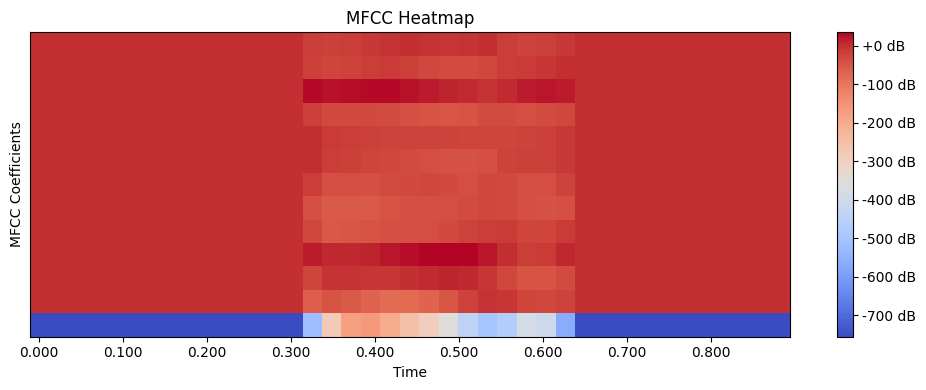

9


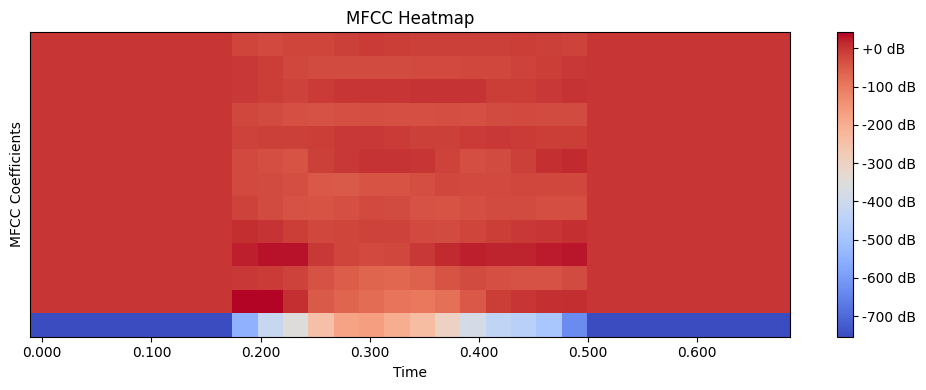

In [ ]:
#displaying heat_map for one sample in each group
def display_heat_map_of_a_sample(temp_dict):
  temp_mfcc = temp_dict['mfcc']
  temp_digit = temp_dict['digit']
  plt.figure(figsize=(10, 4))
  librosa.display.specshow(temp_mfcc, x_axis='time', cmap='coolwarm')
  plt.colorbar(format='%+2.0f dB')
  plt.title('MFCC Heatmap')
  plt.xlabel('Time')
  plt.ylabel('MFCC Coefficients')
  plt.tight_layout()
  plt.show()

for group in grouped_by_digit_label:
  first_sample_dict = group[7]
  print(first_sample_dict['digit'])
  display_heat_map_of_a_sample(first_sample_dict)

<p dir=rtl>پاسخ سوالات مربوط به آشنایی با HMM
</p>

1)
  * **States**:

      In this situation we can not say for example we have 10 hidden States because states in this problema are hidden.

  * **Observations**:
      Observations in an HMM represent the data that the model observes at each time step. In the case of spoken digits recognition, the observations are typically features extracted from the audio signals.
      Commonly used features for speech recognition include Mel-frequency cepstral coefficients (MFCCs), spectrogram features, or filter bank energies.
      Each observation sequence corresponds to the features extracted from the audio recordings of spoken digits.
      The number of observations will depend on the length of the audio recordings and the feature extraction method used.

To summarize:
  Observations: Represent the features extracted from the audio recordings of spoken digits. The number of observations depends on the length of the audio recordings and the feature extraction method used.
  
==================================================================


2)
 **first-order Hidden Markov Model (HMM)** is a type of HMM where each hidden state directly depends only on the previous state. In other words, the transition probabilities between states are defined in such a way that the probability of transitioning from one state to another depends only on the current state and not on any previous states.

To understand this better, let's break down the components of a first-order HMM:

  Hidden States: The model consists of a set of hidden states S={S1,S2,...,SN}S={S1​,S2​,...,SN​}, where NN is the total number of states in the model. Each hidden state represents a particular underlying state or condition of the system being modeled.

  Observations: At each time step, the model emits an observation based on the current hidden state. The set of possible observations is denoted as V={v1,v2,...,vM}V={v1​,v2​,...,vM​}, where MM is the total number of possible observations.



**difference of first order by other**
In contrast to higher-order HMMs, where transition probabilities may depend on multiple previous states (e.g., second-order HMMs), first-order HMMs have a simpler transition structure, making them computationally more efficient and easier to interpret. However, they may not capture as complex dependencies in the underlying system as higher-order HMMs.

Overall, the main difference between a first-order HMM and other HMM variants lies in the structure of the transition probabilities, with first-order HMMs having dependencies only on the previous state.




**features of first order hmms**
  First-Order Dependency: The transition probabilities between hidden states only depend on the previous state. In other words, the probability of transitioning to a certain state at time tt depends only on the state at time t−1t−1.

  Simplicity: First-order HMMs have a simpler transition structure compared to higher-order HMMs. This simplicity makes them computationally more efficient and easier to interpret.

  Efficiency: Due to their simple structure, first-order HMMs are computationally efficient, making them suitable for real-time applications and large datasets.

  Interpretability: The dependency structure of first-order HMMs is easy to interpret, as each state transition is directly influenced by the previous state. This makes it easier to understand the behavior of the model.

  Scalability: First-order HMMs are scalable and can be applied to a wide range of problems, including speech recognition, gesture recognition, bioinformatics, and more.

  Flexibility: Although first-order HMMs have a simple dependency structure, they are still flexible enough to capture complex temporal patterns in data.

Overall, the features of first-order HMMs make them a versatile and widely used tool for modeling sequential data in various domains.

=======================================================================

3)
Hidden Markov Models (HMMs) are suitable for investigating and analyzing phenomena that involve sequential data and where the underlying states are not directly observable but can be inferred from observed data. Here are some examples of phenomena where HMMs can be applied effectively:

  * Speech Recognition: HMMs are widely used in speech recognition systems. They can model the sequence of phonemes in speech signals and infer the most likely sequence of words or sentences.

  * Gesture Recognition: In gesture recognition applications, HMMs can model the temporal patterns of gestures and infer the intended gestures from observed data, such as motion sensor readings.

  * Natural Language Processing: HMMs can be applied to various natural language processing tasks, such as part-of-speech tagging, named entity recognition, and machine translation. They can model the sequence of words in sentences and infer syntactic or semantic structures.

  * Bioinformatics: HMMs are used in bioinformatics for sequence analysis tasks, such as gene finding, sequence alignment, and protein structure prediction. They can model DNA or protein sequences and infer functional or structural information.

  * Financial Time Series Analysis: HMMs can be applied to analyze financial time series data, such as stock prices or market indices. They can model the underlying states of the financial market, such as bull or bear markets, and predict future trends.

  * Robotics and Control Systems: HMMs can be used in robotics and control systems to model the dynamics of physical systems and infer the state of the system from sensor readings. They are used in applications such as robot localization and tracking.

  * Healthcare: In healthcare, HMMs can be applied to analyze patient data, such as electronic health records or physiological signals. They can model the progression of diseases or infer patient states for diagnosis and treatment planning.

Overall, HMMs are versatile models that can be applied to a wide range of phenomena with sequential dependencies, making them valuable tools for investigation and analysis in various fields.

==================================================================

4)

**ADVANTAGES:(in short)**
> Strong statistical foundation
> Efficient learning algorithms-learning can take place directly from raw sequence data.
> Allow consistent treatment of insertion and deletion penalties
in the form of locally learnable
> Can handle inputs of variable length-they are the most
flexible generalization of sequence profiles.
> Wide variety of applications including multiple alignment,
data mining and classification, structural analysis, and pattern
discovery.
> Can be combined into libraries.

**DISADVANTAGES:(in short)**
> HMMs often have a large number of unstructured parameters.
> First order HMMs are limited by their first-order markov property > They cannot express dependencies between hidden states.
> Proteins fold into complex 3-D shapes determining their function.
> The HMM is unable to capture higher order correlation among amino acids in a protein molecule.
> Only a small fraction of distributions over the space of possible
sequences can be represented by a reasonably constrained HMM.

**Advantages:**

  Modeling Sequential Data: HMMs are particularly well-suited for modeling sequential data, where the order of observations matters. They can capture temporal dependencies between observations, making them useful for tasks such as speech recognition, gesture recognition, and time series analysis.

  Flexibility: HMMs are flexible models that can handle a wide range of data types and applications. They can be adapted and extended to suit different problem domains by modifying their parameters and structure.

  Inference: HMMs allow for efficient inference algorithms, such as the forward-backward algorithm and the Viterbi algorithm, which can efficiently compute the most likely sequence of hidden states given observed data.

  Generative Modeling: HMMs are generative models, meaning they can generate new sequences of observations that are similar to the training data. This property is useful for tasks such as data augmentation and simulation.

  Interpretability: HMMs provide a clear and interpretable framework for modeling sequential data. The hidden states represent underlying patterns or processes in the data, making it easier to understand the behavior of the model.

**Disadvantages:**

  Sensitivity to Model Parameters: HMMs require the specification of several parameters, including the number of hidden states and the transition probabilities. The performance of the model can be sensitive to these parameters, and finding the optimal values can be challenging.

  Assumption of Stationarity: HMMs assume that the underlying process generating the data is stationary, meaning that the statistical properties do not change over time. This assumption may not hold in real-world applications with non-stationary data.

  Limited Expressiveness: HMMs have limited expressive power compared to other models, such as deep neural networks. They may struggle to capture complex patterns in high-dimensional data or data with long-range dependencies.

  Initialization Sensitivity: The performance of HMMs can be sensitive to the initialization of parameters, such as the initial state distribution and emission probabilities. Poor initialization can lead to suboptimal results or convergence issues during training.

  Difficulty in Handling Long Sequences: HMMs may encounter difficulties in modeling long sequences of data due to the limitations of the forward-backward and Viterbi algorithms, which have a time complexity that grows linearly with the length of the sequence.

Overall, while HMMs offer many advantages for modeling sequential data, they also have limitations that need to be considered when applying them to real-world problems. It's important to carefully evaluate the suitability of HMMs for a particular task and consider alternative modeling approaches when necessary.

=================================================================

5)

Hidden Markov Models (HMMs) can be classified into several types based on their characteristics and the nature of the hidden and observed variables. Here are **some common types of HMMs:**

  * **First-order HMM:** In a first-order HMM, the current state depends only on the previous state, and observations are emitted from each state independently. It's the simplest form of HMM where the transition probabilities and emission probabilities are fixed.

  * **Higher-order HMM:** In higher-order HMMs, the current state depends on multiple previous states rather than just the immediate previous state. These models capture longer dependencies in the sequence of hidden states.

  * **Left-to-right HMM:** Left-to-right HMMs are a special case of HMMs where the states are organized in a linear sequence, and transitions are only allowed to move from left to right. This structure is commonly used in speech recognition systems.

  * **Ergodic HMM:** Ergodic HMMs, also known as fully connected HMMs, allow transitions between any pair of states. This means that the model can move from any state to any other state, which provides more flexibility but also increases the number of parameters to be estimated.

  * **Continuous HMM:** In continuous HMMs, the observations are continuous rather than discrete. These models are commonly used in applications where the observed data is continuous, such as speech or sensor data.

  * **Discrete HMM:** Discrete HMMs are the traditional form of HMM where both the hidden states and observed symbols are discrete. They are widely used in various applications, including speech recognition, bioinformatics, and natural language processing.

  * **Left-right continuous HMM:** Left-right continuous HMMs combine the properties of left-to-right HMMs with continuous observations. They are often used in speech recognition and gesture recognition tasks.

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm

**Following part is about models that target val = DigitLabel**

**Implementing by libraries**

Here I made a model for Zero and in the following part I used this to make models for the other numbers

In [ ]:
#making zero model
zero_mfccs = []
for i in range(NUM_TRAIN_SAMPLES):
  temp_mfcc = grouped_by_digit_label[0][i]['mfcc']
  zero_mfccs.append(temp_mfcc.T)

#concatenating mfccs to a single array
single_mfcc_0 = np.concatenate(zero_mfccs)


ZeroModel = hmm.GaussianHMM(n_components=NUM_HIDDEN_STATES, covariance_type="diag")
ZeroModel.fit(single_mfcc_0)


GaussianHMM(n_components=8)

Here I made a function that generates the model according to the same method that I used to make the previous model

In this function, I give a digit_label that I want to make a model for it and according to it, I collect a specific number(NUM_TRAIN_SAMPLES) of mfccs from training samples and concatenate them to a single array, then I use (.fit()) to train the model and finally this function return the trained model.

In [ ]:
def digit_label_model_maker(digit):
  digit_mfccs =[]
  for i in range(NUM_TRAIN_SAMPLES):
    temp_mfcc = grouped_by_digit_label[digit][i]['mfcc']
    digit_mfccs.append(temp_mfcc.T)
  #concatenating mfccs to a single array
  single_mfcc_digit = np.concatenate(digit_mfccs)

  DigitModel = hmm.GaussianHMM(n_components=NUM_HIDDEN_STATES, covariance_type="diag")
  DigitModel.fit(single_mfcc_digit)

  return DigitModel

Here, I made model for the other digits(1 to 9)
I defined number of hidden states that I can chanje it,after testing some numbers for it like5, 8, 6 etc. I choose 6 because I give better precision from my models with 6 hedden states.

In [ ]:
OneModel = digit_label_model_maker(1)

In [ ]:
TwoModel = digit_label_model_maker(2)

In [ ]:
ThreeModel = digit_label_model_maker(3)

In [ ]:
FourModel = digit_label_model_maker(4)

In [ ]:
FiveModel = digit_label_model_maker(5)

In [ ]:
SixModel = digit_label_model_maker(6)

In [ ]:
SevenModel = digit_label_model_maker(7)

In [ ]:
EightModel = digit_label_model_maker(8)

In [ ]:
NineModel = digit_label_model_maker(9)

In this section, I collect the models to a list for the next part in testing samples, I will give a sample to all these models and then I make a decision based on the points given by each model.

In [ ]:
#making a list of digit models by library
digit_models_by_library = [ZeroModel, OneModel, TwoModel, ThreeModel, FourModel, FiveModel, SixModel, SevenModel, EightModel, NineModel]

**پاسخ سوالات مریوط به ارزیابی و تحلیل**


1 , 3)

**Evaluation Methods**


**Accuracy Score** -> Accuracy = TN + TP / TN + FP + TP + FN

Accuracy represents the number of correctly classified data instances over the total number of data instances.But it may not be a good measure if the dataset is not balanced (both negative and positive classes have different number of data instances).Using accuracy in such scenarios can result in misleading interpretation of results.

================================================================================

**Precision** -> Precision = TP / TP + FP

Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases (which we don’t want).

================================================================================

**Recall**

 Recall is also known as sensitivity or true positive rate and is defined as follows:

 Recall = TP / TP + FN

 Recall should ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP +FN, this also means FN is zero. As FN increases the value of denominator becomes greater than the numerator and recall value decreases (which we don’t want).

 ==============================================================================

 **F1** -> So ideally in a good classifier, we want both precision and recall to be one which also means FP and FN are zero. Therefore we need a metric that takes into account both precision and recall. F1-score is a metric which takes into account both precision and recall and is defined as follows:

 F1 Score = 2 * (Precision * Recall / Precision + Recall)

 F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.

 ==============================================================================

2)
yes we have challenge because these formulas are for binary classification mode but here we have a multi-class model but they are also defined for multi-class mode

 =============================================================================

4)

 because they focus on different aspects of the model's performance and can sometimes provide conflicting information.

 While precision and recall provide valuable insights into different aspects of model performance, they don't give a complete picture on their own because:

  * **Trade-off between Precision and Recall:** Increasing precision often leads to a decrease in recall, and vice versa. This trade-off is inherent in many classification problems. For example, a model can achieve high precision by being conservative and only predicting positive instances when it is very confident, but this approach may lead to missing many positive instances, resulting in low recall.

  * **Need for Balance:** Depending on the specific requirements of the application, you may need to strike a balance between precision and recall. For instance, in a medical diagnosis scenario, you want high recall to ensure that as many true positive cases are detected as possible, but you also need high precision to minimize false alarms and unnecessary treatments.

  * **Class Imbalance:** Precision and recall can be affected by class imbalance. In situations where one class dominates the dataset, a model might achieve high recall for the dominant class but low precision due to a high number of false positives in minority classes.

=============================================================================
  
5)
  The F1 score uses harmonic mean averaging.The harmonic mean is used because it gives more weight to lower values. In other words, if either precision or recall is low, the F1 score will be low, which helps penalize models that perform poorly on either metric.

  The harmonic mean is particularly useful for situations where you want to balance the influence of different values. In the context of precision and recall, using the harmonic mean ensures that the F1 score reflects a balance between these two metrics.

============================================================================





Here I have some funcions that I clear them in short:

* accuracy_calculator -> it gives number of correct predictions and number of all predictions and return accuracy

* precision_micro_average_calculator -> it gives a list of TPs and FPs and return precision(using micro-average method)

* precision_macro_average_calculator -> it gives a list of TPs and FPs and return precision(using macro-average method)

In [ ]:
#parameter calculator functions
def accuracy_calculator(correct_pred, all_pred):
  accuracy = correct_pred / all_pred
  return accuracy

def precision_micro_average_calculator(list_of_TP_and_FP):
  numerator = 0
  denominator = 0
  for sub_list in list_of_TP_and_FP:
    numerator += sub_list[0]
    denominator += (sub_list[0] + sub_list[1])

  precision = numerator / denominator
  return precision

def precision_macro_average_calculator(list_of_TP_and_FP):
  numerator = 0
  denominator = 0
  for sub_list in list_of_TP_and_FP:
    temp_precision = sub_list[0] / (sub_list[0] + sub_list[1])
    numerator += temp_precision

  macro_precision = numerator / len(list_of_TP_and_FP)
  return macro_precision

Here is a function that is use to display confusion matrix, it gives confusion matrix, name of classes(after classification) and label that it shown before matrix and graphically display confusion matrix

In [ ]:
#function for displaying confusion matrix
def confusion_matrix_displayer(confusion_matrix, class_names, label):
  confusion_matrix = np.array(confusion_matrix)

  plt.figure(figsize=(8, 6))
  plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.binary)
  plt.title('Confusion Matrix ')
  plt.colorbar()

  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  for i in range(len(class_names)):
    for j in range(len(class_names)):
      plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='blue')

  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.tight_layout()
  plt.show()

Here is for testing models that is about digit labels and I developed them using hmmlearn library

First of all I collect samples that I didn't use them for training into a list.This list has all test samples for testing my models.

**digit_predictor** is a function that gives a sample(element of a dictionary that has name_of_speaker, digit_label, num_sample and mfcc), then according to its mfcc, it given to each digit model using (.score) attribute and each model returns a score, whichever model gives more points, we predict that the sample belongs to that model and return predicted digit

In the last part, we give each testing sample to digit_predictor function and get a predicted_digit from it, then we add this predicted_digit to information of sample(we add 'pred_digit_lib' key to its element in dictionary).and in addition to this, I count number of True predictions.Finally I give number of correct predictions and number of elements of testing sample to **accuracy_calculator** function and it return accuracy.

In [ ]:
#testing digit model(by library)
#I trained my models using 260 samples for each model to train so here i will test them all using 300 - 260 = 40 for each number (40 * 10 = 400) testing samples
list_of_test_samples = []
for i in range(len(grouped_by_digit_label)):
  for j in range(NUM_TRAIN_SAMPLES, NUM_MAX_SAMPLE):
    list_of_test_samples.append(grouped_by_digit_label[i][j])

def digit_predictor(sample):
  result_dict = dict()
  temp_mfcc = sample['mfcc'].T
  for i in range(len(digit_models_by_library)):
    log_likelihood = digit_models_by_library[i].score(temp_mfcc)
    result_dict[i] = log_likelihood
    max_key_digit_index = max(result_dict, key=result_dict.get)
  return max_key_digit_index

#here samples will update and their predicted group add to their block in list_of_the_test_samples
correct_pred_dig_lib = 0
for sample in list_of_test_samples:
  predicted_digit = digit_predictor(sample)
  if predicted_digit == int(sample['digit']):
    correct_pred_dig_lib += 1
  sample['pred_digit_lib'] = predicted_digit

accuracy_dig_lib = accuracy_calculator(correct_pred_dig_lib, len(list_of_test_samples))

In this part I check actual_digit_label and predicted_digit_label for each testing sample and I count TP and FP for each class(I append these to list_of_TP_FP_for_classes list).After that I give the list to **precision_micro_average_calculator** and **precision_macro_average_calculator** functions and they return precisions.

In [ ]:
#calculating precision using micro-average method and macro-average method
list_of_TP_FP_for_classes = [[] for _ in range(NUM_DIGITS)]
for i in range(len(list_of_TP_FP_for_classes)):
  temp_TP = 0
  temp_FP = 0
  for sample in list_of_test_samples:
    if int(sample['digit']) == i:
      if sample['pred_digit_lib'] == i:
        temp_TP += 1
      else:
        temp_FP += 1
  list_of_TP_FP_for_classes[i].append(temp_TP)
  list_of_TP_FP_for_classes[i].append(temp_FP)


precision_micro_average = precision_micro_average_calculator(list_of_TP_FP_for_classes)
precision_macro_average = precision_macro_average_calculator(list_of_TP_FP_for_classes)

Here I print accuracy and precision for models that I made by hmmlearn library and target_val = Digit_Label.

In [ ]:
print('Accuracy(digit + library) = ', accuracy_dig_lib)
print('Precision(digit + library + micro_average) = ', precision_micro_average)
print('Precision(digit + library + macro_average) = ', precision_macro_average)

Accuracy(digit + library) =  0.7875
Precision(digit + library + micro_average) =  0.7875
Precision(digit + library + macro_average) =  0.7875


I changed hyperparameter of number of hidden states from 5 to 8 and both accuracy and precision changed from 0.7225 to 0.7675(in last version 0.7725)

I deleted n_iterations in making models and after that they changed from 0.7675 to 0.735


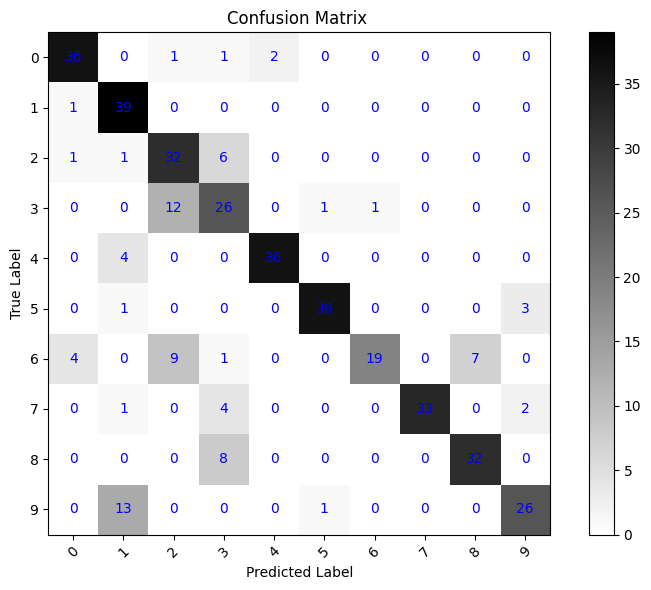

In [ ]:
#making confusion matrix for digit_label_lib part
actual_digit_lib = []
predicted_digit_lib = []

digit_names = []
for i in range(NUM_DIGITS):
  digit_names.append(str(i))

confusion_matrix_digit_lib = confusion_matrix = [[0] * NUM_DIGITS for _ in range(NUM_DIGITS)]

#filling actual_names and predicted_names
for sample in list_of_test_samples:
  actual_digit_lib.append(sample['digit'])
  predicted_digit_lib.append(sample['pred_digit_lib'])

#filling the confusion matrix
for actual, predicted in zip(actual_digit_lib, predicted_digit_lib):
  actual_index = digit_names.index(actual)
  predicted_index = digit_names.index(str(predicted))
  confusion_matrix_digit_lib[actual_index][predicted_index] += 1

# print(confusion_matrix_digit_lib)
confusion_matrix_displayer(confusion_matrix_digit_lib, digit_names, '(DigitLabels + Lib)')

<p dir=rtl>
از این قسمت  تا انتهای پروژه، علاوه بر پاسخ سوالات موجود در صورت پروژه،سه بخش اصلی وجود دارد که دقیقا مشابه قسمت قبلی با توجه به target value و اینکه بخش by library است و یا from scratch انجام شده است که این سه قسمت به ترتیب عبارتند از:

* target_val = DigitLabel / by library
* target_val = DigitLabel / from scratch
* target_val = SpeakerName / from scratch
</p>

**Following part is about models that target val = speakerName**

**Implementing by libraries**

In [ ]:
#making groups by name of speakers
grouped_by_name = dict()
for item in all_samples_by_mfcc:
  name = item['name']
  if name in grouped_by_name.keys():
    grouped_by_name[name].append(item)
  else:
    grouped_by_name[name] = []
    grouped_by_name[name].append(item)

In [ ]:
def speaker_model_maker(name, name_samples):
  speaker_mfccs =[]
  for i in range(NUM_TRAIN_SAMPLES_SPEAKERS):
    temp_mfcc = name_samples[i]['mfcc']
    speaker_mfccs.append(temp_mfcc.T)
  #concatenating mfccs to a single array
  single_mfcc_names = np.concatenate(speaker_mfccs)

  SpeakerModel = hmm.GaussianHMM(n_components=NUM_HIDDEN_STATES, covariance_type="diag", n_iter=100)
  SpeakerModel.fit(single_mfcc_names)

  return SpeakerModel

here I make models of speaker names

In [ ]:
dict_of_speaker_name_models = dict()
for speaker_name in grouped_by_name.keys():
  dict_of_speaker_name_models[speaker_name] = None

speaker_names = list(dict_of_speaker_name_models.keys())
speak_0_model = speaker_model_maker(speaker_names[0], list(grouped_by_name.values())[0])
dict_of_speaker_name_models[speaker_names[0]] = speak_0_model
print(speaker_names[0])

theo


In [ ]:
speak_1_model = speaker_model_maker(speaker_names[1], list(grouped_by_name.values())[1])
dict_of_speaker_name_models[speaker_names[1]] = speak_1_model
print(speaker_names[1])

nicolas


In [ ]:
speak_2_model = speaker_model_maker(speaker_names[2], list(grouped_by_name.values())[2])
dict_of_speaker_name_models[speaker_names[2]] = speak_2_model
print(speaker_names[2])

yweweler


In [ ]:
speak_3_model = speaker_model_maker(speaker_names[3], list(grouped_by_name.values())[3])
dict_of_speaker_name_models[speaker_names[3]] = speak_3_model
print(speaker_names[3])

george


In [ ]:
speak_4_model = speaker_model_maker(speaker_names[4], list(grouped_by_name.values())[4])
dict_of_speaker_name_models[speaker_names[4]] = speak_4_model
print(speaker_names[4])

jackson


In [ ]:
speak_5_model = speaker_model_maker(speaker_names[5], list(grouped_by_name.values())[5])
dict_of_speaker_name_models[speaker_names[5]] = speak_5_model
print(speaker_names[5])

lucas


In [ ]:
#testing speaker name model(by library)
#I trained my models using 420 samples for each model to train so here i will test them all using 500 - 420 = 80 for each number (80 * 6 = 480) testing samples
list_of_test_samples_speak_lib = []
for speaker_name in dict_of_speaker_name_models.keys():
  for j in range(NUM_TRAIN_SAMPLES_SPEAKERS, NUM_MAX_SAMPLE_SPEAKERS):
    list_of_test_samples_speak_lib.append(grouped_by_name[speaker_name][j])

def name_predictor(sample):
  result_dict = dict()
  temp_mfcc = sample['mfcc'].T
  for name, model in dict_of_speaker_name_models.items():
    log_likelihood = model.score(temp_mfcc)
    result_dict[name] = log_likelihood
  max_key_digit_index = max(result_dict, key=result_dict.get)
  return max_key_digit_index

#here samples will update and their predicted speaker name add to their block in list_of_the_test_samples
correct_pred_name_lib = 0
for sample in list_of_test_samples_speak_lib:
  predicted_name = name_predictor(sample)
  if predicted_name == sample['name']:
    correct_pred_name_lib += 1
  sample['pred_name_lib'] = predicted_name

accuracy_speaker_name_lib = accuracy_calculator(correct_pred_name_lib, len(list_of_test_samples_speak_lib))

In [ ]:
#calculating precision using micro-average method and macro-average method
list_of_TP_FP_for_classes_name_lib = [[] for _ in range(len(speaker_names))]
for i in range(len(list_of_TP_FP_for_classes_name_lib)):
  temp_TP = 0
  temp_FP = 0
  for sample in list_of_test_samples_speak_lib:
    if sample['name'] == speaker_names[i]:
      if sample['pred_name_lib'] == speaker_names[i]:
        temp_TP += 1
      else:
        temp_FP += 1
  list_of_TP_FP_for_classes_name_lib[i].append(temp_TP)
  list_of_TP_FP_for_classes_name_lib[i].append(temp_FP)


precision_micro_average_name_lib = precision_micro_average_calculator(list_of_TP_FP_for_classes_name_lib)
precision_macro_average_name_lib = precision_macro_average_calculator(list_of_TP_FP_for_classes_name_lib)

In [ ]:
print('Accuracy(speaker_name + library) = ', accuracy_speaker_name_lib)
print('Precision(speaker_name + library + micro_average) = ', precision_micro_average_name_lib)
print('Precision(speaker_name + library + macro_average) = ', precision_macro_average_name_lib)

Accuracy(speaker_name + library) =  0.95625
Precision(speaker_name + library + micro_average) =  0.95625
Precision(speaker_name + library + macro_average) =  0.9562499999999999


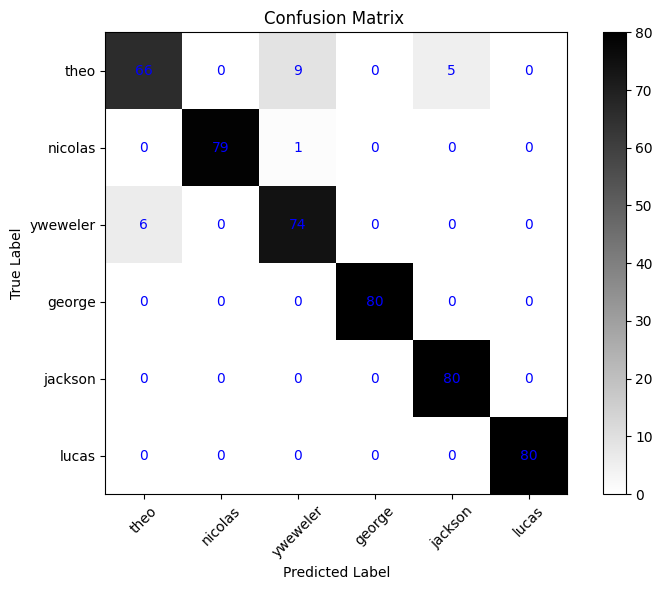

In [ ]:
#making confusion matrix for speaker_name_lib part
actual_names_lib = []
predicted_names_lib = []

confusion_matrix_name_lib = confusion_matrix = [[0] * len(speaker_names) for _ in range(len(speaker_names))]

#filling actual_names and predicted_names
for sample in list_of_test_samples_speak_lib:
  actual_names_lib.append(sample['name'])
  predicted_names_lib.append(sample['pred_name_lib'])

#filling the confusion matrix
for actual, predicted in zip(actual_names_lib, predicted_names_lib):
  actual_index = speaker_names.index(actual)
  predicted_index = speaker_names.index(predicted)
  confusion_matrix_name_lib[actual_index][predicted_index] += 1

# print(confusion_matrix_name_lib)
confusion_matrix_displayer(confusion_matrix_name_lib, speaker_names, '(SpeakerNames + Lib)')

<p dir=rtl>
در این بخش قطعه کد ناقصی که در سامانه ایلرن بارگذاری شده بود با توجه به الگوریتم forward-backward و مطالب ارائه شده در اسلاید های مبحث HMM کامل شد و در ادامه با استفاده از آن به train کردن مدل های مختلف پرداخته شده است.
</p>

In [ ]:
#here I import this library because in _state_likelihood function I use Multivariate normal distribution according to thee pdf
from scipy.stats import multivariate_normal
NUM_ITERATIONS = 20
NUM_HIDDEN_STATES_SCRATCH = 8
import scipy

In [ ]:
import numpy as np

class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:, t] = self.initial_prob.flatten() * observation_matrix[:, t]
            else:
                alpha[:, t] = self._normalize(np.dot(self.transition_matrix.T, alpha[:, t - 1])) * observation_matrix[:, t]

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = self._normalize(np.dot(self.transition_matrix, beta[:, t + 1] * observation_matrix[:, t + 1]))
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
           B[s, :]=scipy.stats.multivariate_normal.pdf(obs.T, mean=self.mean[:, s].T, cov=self.covariances[:, :, s].T)

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _multivariate_normal_pdf(self, x, mean, cov):
        d = x.shape[0]
        det_cov = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)
        diff = x - mean
        exponent = -0.5 * np.dot(np.dot(diff.T, inv_cov), diff)
        return (1.0 / np.sqrt((2 * np.pi) ** d * det_cov)) * np.exp(exponent)

    def train(self, obs, num_iterations):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = (self.transition_matrix) * (np.outer(alpha[:, t], beta[:, t + 1]) * B[:, t + 1])
            xi_sum += self._normalize(partial_sum)

            partial_g = alpha[:, t] * beta[:, t]
            gamma[:, t] = self._normalize(partial_g)

        partial_g = alpha[:, -1] * beta[:, -1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0]
        expected_transition = self._stochasticize(xi_sum)

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))

**Following part is about models that target val = DigtLabel**

**Implementing from scratch**

In [ ]:
# hmm_models = []
def digit_label_model_maker_scratch(digit):
  digit_mfccs =[]
  for i in range(NUM_TRAIN_SAMPLES):
    temp_mfcc = grouped_by_digit_label[digit][i]['mfcc']
    digit_mfccs.append(temp_mfcc)
  #concatenating mfccs to a single array
  digit_mfccs_concatenated = np.concatenate(digit_mfccs, axis=1)

  DigitModelScratch = HMM(NUM_HIDDEN_STATES_SCRATCH)
  DigitModelScratch.train(digit_mfccs_concatenated, NUM_ITERATIONS)

  return DigitModelScratch

In [ ]:
ZeroModelScr = digit_label_model_maker_scratch(0)

In [ ]:
OneModelScr = digit_label_model_maker_scratch(1)

In [ ]:
TwoModelScr = digit_label_model_maker_scratch(2)

In [ ]:
ThreeModelScr = digit_label_model_maker_scratch(3)

In [ ]:
FourModelScr = digit_label_model_maker_scratch(4)

In [ ]:
FiveModelScr = digit_label_model_maker_scratch(5)

In [ ]:
SixModelScr = digit_label_model_maker_scratch(6)

In [ ]:
SevenModelScr = digit_label_model_maker_scratch(7)

In [ ]:
EightModelScr = digit_label_model_maker_scratch(8)

In [ ]:
NineModelScr = digit_label_model_maker_scratch(9)

In [ ]:
#making a list of digit models by library
digit_models_from_scratch = [ZeroModelScr, OneModelScr, TwoModelScr, ThreeModelScr, FourModelScr, FiveModelScr, SixModelScr, SevenModelScr, EightModelScr, NineModelScr]

In [ ]:
#testing digit model(from scratch)
#I trained my models using 260 samples for each model to train so here i will test them all using 300 - 260 = 40 for each number (40 * 10 = 400) testing samples
def digit_predictor_scr(sample):
  result_dict = dict()
  temp_mfcc = sample['mfcc']
  for i in range(len(digit_models_from_scratch)):
    log_likelihood = digit_models_from_scratch[i].score(temp_mfcc)
    result_dict[i] = log_likelihood
    max_key_digit_index = max(result_dict, key=result_dict.get)
  return max_key_digit_index

#here samples will update and their predicted group add to their block in list_of_the_test_samples
correct_pred_dig_scr = 0
for sample in list_of_test_samples:
  predicted_digit_scr = digit_predictor_scr(sample)
  if predicted_digit_scr == int(sample['digit']):
    correct_pred_dig_scr += 1
  sample['pred_digit_scr'] = predicted_digit_scr

accuracy_dig_scr = accuracy_calculator(correct_pred_dig_scr, len(list_of_test_samples))

In [ ]:
#calculating precision using micro-average method and macro-average method for (digit + lib)
list_of_TP_FP_for_classes_digit_scr = [[] for _ in range(NUM_DIGITS)]
for i in range(len(list_of_TP_FP_for_classes_digit_scr)):
  temp_TP_scr = 0
  temp_FP_scr = 0
  for sample in list_of_test_samples:
    if int(sample['digit']) == i:
      if sample['pred_digit_scr'] == i:
        temp_TP_scr += 1
      else:
        temp_FP_scr += 1
  list_of_TP_FP_for_classes_digit_scr[i].append(temp_TP_scr)
  list_of_TP_FP_for_classes_digit_scr[i].append(temp_FP_scr)


precision_micro_average_digit_scr = precision_micro_average_calculator(list_of_TP_FP_for_classes_digit_scr)
precision_macro_average_digit_scr = precision_macro_average_calculator(list_of_TP_FP_for_classes_digit_scr)

In [ ]:
print('Accuracy(digit + from scratch) = ', accuracy_dig_scr)
print('Precision(digit + from scratch + micro_average) = ', precision_micro_average_digit_scr)
print('Precision(digit + from scratch + macro_average) = ', precision_macro_average_digit_scr)

Accuracy(digit + from scratch) =  0.4375
Precision(digit + from scratch + micro_average) =  0.4375
Precision(digit + from scratch + macro_average) =  0.4375


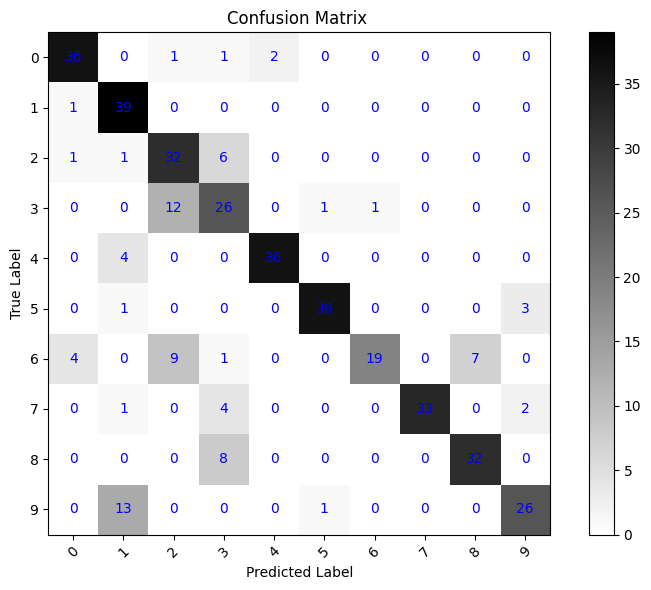

In [ ]:
#making confusion matrix for digit_label_scr part
actual_digit_scr = []
predicted_digit_scr = []

confusion_matrix_digit_scr = confusion_matrix = [[0] * NUM_DIGITS for _ in range(NUM_DIGITS)]

#filling actual_names and predicted_names
for sample in list_of_test_samples:
  actual_digit_scr.append(sample['digit'])
  predicted_digit_scr.append(sample['pred_digit_lib'])

#filling the confusion matrix
for actual, predicted in zip(actual_digit_scr, predicted_digit_scr):
  actual_index = digit_names.index(actual)
  predicted_index = digit_names.index(str(predicted))
  confusion_matrix_digit_scr[actual_index][predicted_index] += 1

# print(confusion_matrix_name_lib)
confusion_matrix_displayer(confusion_matrix_digit_scr, digit_names, '(DigitLabels + Scr)')

**Following part is about models that target val = SpeakerName**

**Implementing from scratch**

In [ ]:
#function for making model (target_val = speaker_name + from scratch)
def speaker_name_model_maker_scratch(name, name_samples):
  speaker_mfccs =[]
  for i in range(NUM_TRAIN_SAMPLES_SPEAKERS):
    temp_mfcc = name_samples[i]['mfcc']
    speaker_mfccs.append(temp_mfcc)
  #concatenating mfccs to a single array
  single_mfcc_names = np.hstack(speaker_mfccs)

  SpeakerModelScratch = HMM(NUM_HIDDEN_STATES)
  SpeakerModelScratch.train(single_mfcc_names, NUM_ITERATIONS)

  return SpeakerModelScratch

Here I developed models for speaker names using HMM class that I completed it.

In [ ]:
dict_of_speaker_name_models_scr = dict()
for speaker_name in grouped_by_name.keys():
  dict_of_speaker_name_models_scr[speaker_name] = None

speak_0_model_scr = speaker_name_model_maker_scratch(speaker_names[0], grouped_by_name[speaker_names[0]])
dict_of_speaker_name_models_scr[speaker_names[0]] = speak_0_model_scr
print(speaker_names[0])

theo


In [ ]:
speak_1_model_scr = speaker_name_model_maker_scratch(speaker_names[1], grouped_by_name[speaker_names[1]])
dict_of_speaker_name_models_scr[speaker_names[1]] = speak_1_model_scr
print(speaker_names[1])

nicolas


In [ ]:
speak_2_model_scr = speaker_name_model_maker_scratch(speaker_names[2], grouped_by_name[speaker_names[2]])
dict_of_speaker_name_models_scr[speaker_names[2]] = speak_2_model_scr
print(speaker_names[2])

yweweler


In [ ]:
speak_3_model_scr = speaker_name_model_maker_scratch(speaker_names[3], grouped_by_name[speaker_names[3]])
dict_of_speaker_name_models_scr[speaker_names[3]] = speak_3_model_scr
print(speaker_names[3])

george


In [ ]:
speak_4_model_scr = speaker_name_model_maker_scratch(speaker_names[4], grouped_by_name[speaker_names[4]])
dict_of_speaker_name_models_scr[speaker_names[4]] = speak_4_model_scr
print(speaker_names[4])

jackson


In [ ]:
speak_5_model_scr = speaker_name_model_maker_scratch(speaker_names[5], grouped_by_name[speaker_names[5]])
dict_of_speaker_name_models_scr[speaker_names[5]] = speak_5_model_scr
print(speaker_names[5])

lucas


In [ ]:
#testing speaker name model(from scratch)
#I trained my models using 420 samples for each model to train so here i will test them all using 500 - 420 = 80 for each number (80 * 6 = 480) testing samples
list_of_test_samples_speak_scr = []
for speaker_name in dict_of_speaker_name_models_scr.keys():
  for j in range(NUM_TRAIN_SAMPLES_SPEAKERS, NUM_MAX_SAMPLE_SPEAKERS):
    list_of_test_samples_speak_scr.append(grouped_by_name[speaker_name][j])

def name_predictor_scr(sample):
  result_dict = dict()
  temp_mfcc = sample['mfcc']
  for name, model in dict_of_speaker_name_models_scr.items():
    log_likelihood = model.score(temp_mfcc)
    result_dict[name] = log_likelihood
  max_key_digit_index = max(result_dict, key=result_dict.get)
  return max_key_digit_index

#here samples will update and their predicted speaker name add to their block in list_of_the_test_samples
correct_pred_name_scr = 0
for sample in list_of_test_samples_speak_lib:
  predicted_name = name_predictor_scr(sample)
  if predicted_name == sample['name']:
    correct_pred_name_scr += 1
  sample['pred_name_scr'] = predicted_name

accuracy_speaker_name_scr = accuracy_calculator(correct_pred_name_scr, len(list_of_test_samples_speak_scr))

In [ ]:
#calculating precision using micro-average method and macro-average method
list_of_TP_FP_for_classes_name_scr = [[] for _ in range(len(speaker_names))]
for i in range(len(list_of_TP_FP_for_classes_name_scr)):
  temp_TP_nscr = 0
  temp_FP_nscr = 0
  for sample in list_of_test_samples_speak_lib:
    if sample['name'] == speaker_names[i]:
      if sample['pred_name_scr'] == speaker_names[i]:
        temp_TP_nscr += 1
      else:
        temp_FP_nscr += 1
  list_of_TP_FP_for_classes_name_scr[i].append(temp_TP_nscr)
  list_of_TP_FP_for_classes_name_scr[i].append(temp_FP_nscr)


precision_micro_average_name_scr = precision_micro_average_calculator(list_of_TP_FP_for_classes_name_scr)
precision_macro_average_name_scr = precision_macro_average_calculator(list_of_TP_FP_for_classes_name_scr)

In [ ]:
print('Accuracy(speaker_name + from scratch) = ', accuracy_speaker_name_scr)
print('Precision(speaker_name + from scratch + micro_average) = ', precision_micro_average_name_scr)
print('Precision(speaker_name + from scratch + macro_average) = ', precision_macro_average_name_scr)

Accuracy(speaker_name + from scratch) =  0.4354166666666667
Precision(speaker_name + from scratch + micro_average) =  0.4354166666666667
Precision(speaker_name + from scratch + macro_average) =  0.43541666666666673


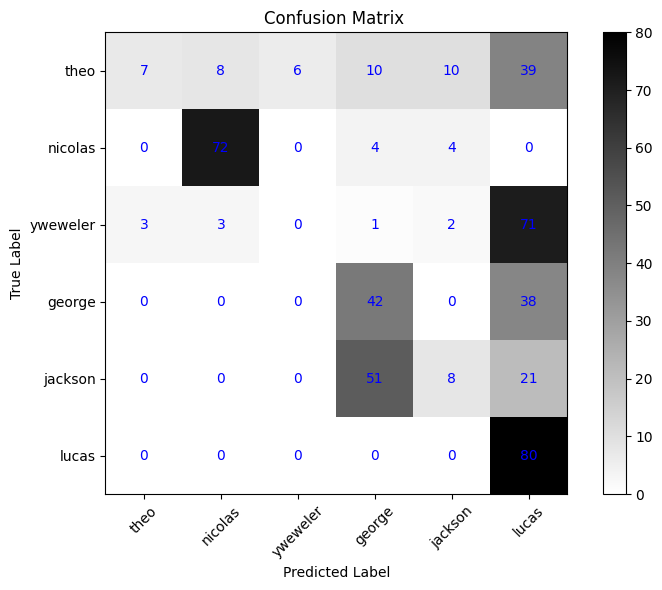

In [ ]:
#making confusion matrix for speaker_name_scr part
actual_names_scr = []
predicted_names_scr = []

confusion_matrix_name_scr = confusion_matrix = [[0] * len(speaker_names) for _ in range(len(speaker_names))]

#filling actual_names and predicted_names
for sample in list_of_test_samples_speak_scr:
  actual_names_scr.append(sample['name'])
  predicted_names_scr.append(sample['pred_name_scr'])

#filling the confusion matrix
for actual, predicted in zip(actual_names_scr, predicted_names_scr):
  actual_index = speaker_names.index(actual)
  predicted_index = speaker_names.index(predicted)
  confusion_matrix_name_scr[actual_index][predicted_index] += 1

# print(confusion_matrix_name_scr)
confusion_matrix_displayer(confusion_matrix_name_scr, speaker_names, '(SpeakerNames + Scr)')

**پاسخ به دو پرسش اساسی**

<p dir=rtl>1) چرا دقت مدل های speaker_name_based از مدل های digit_label_based بیشتر شد؟
</p>

<p dir=rtl>
دلایلی وجود دارد که ممکن است باعث این اتفاق شود که به آنها اشاره می کنم:
</p>
<p dir=rtl>
  تنوع در تلفظ: اسپیکرهای مختلف ممکن است هر رقم را به شکل متفاوتی تلفظ کنند. به عنوان مثال، یک سخنگو ممکن است "پنج" را با لهجه یا زمینه صوتی متفاوتی نسبت به سخنگوی دیگری تلفظ کند. مدل‌های مبتنی بر سخنگو این تنوع را بهتر می‌توانند درک کنند زیرا ویژگی‌های خاص به هر سخنگو را یاد می‌گیرند.

  <p dir=rtl>میزان داده‌های آموزشی: اگر برای هر سخنگو میزان بیشتری داده آموزشی موجود باشد نسبت به تعداد نمونه‌های موجود برای هر رقم، مدل مبتنی بر سخنگو ممکن است به دلیل داشتن اطلاعات بیشتری برای یادگیری، بهتر عمل کند.

  <p dir=rtl>پیچیدگی مدل: مدل‌های مبتنی بر سخنگو ممکن است حاوی پارامترهای بیشتری نسبت به مدل‌های مبتنی بر رقم باشند، به ویژه اگر سخنگوها کمتر از رقم‌ها باشند. پارامترهای بیشتر به مدل امکان می‌دهند جزئیات و تغییرات دقیق‌تری را درک کند که ممکن است منجر به بهبود عملکرد شود.

  <p dir=rtl>تنوع سخنگوها: سخنگوها ممکن است انواع مختلفی از سبک گفتار، لهجه، زمینه صوتی و ... داشته باشند. مدل‌های مبتنی بر سخنگو طراحی شده‌اند تا این تفاوت‌های خاص به هر سخنگو را درک کنند که می‌تواند عملکرد را بهبود بخشد.

  <p dir=rtl>تنوع درون سخنگویی مقابل تنوع بین سخنگوها: در مدل‌سازی مبتنی بر سخنگو، مدل باید بین سخنگوهای مختلف تمایز قائل شود که می‌تواند منجر به تعمیم بهتری در سراسر سخنگوهای مختلف شود. از طرف دیگر، در مدل‌سازی مبتنی بر رقم، مدل باید تغییرات در داخل همان رقم را در طول زمان یاد بگیرد که ممکن است چالش بیشتری باشد.
</p>
<p dir=rtl>
در هر صورت در این پروژه ترکیب این موارد با درصد های مختلف باعث این امر می شود که بنظر من اولین مورد یعنی تنوع در تلفظ تاثیز بالانری نسبت به بقیه در این امر دارد.
</p>


<p dir=rtl>
2)  چرا دقت مدل های بخش اول پروژه نسبت به مدل های بخش دوم پروژه بالاتر بود؟
</p>


<p dir=rtl>
عوامل مختلفی می تواند باعث این امر شود.ممکن است کتابخانه hmmlearn یک الگوریتم بهینه‌سازی یا یک روش آموزش بهتری داشته باشد که به عملکرد بهتر مدل‌ها منجر شود.ممکن است کلاسی که خودمان پیاده‌سازی کردیم، متدهای خاص و انعطاف‌ پذیری کمتری در آموزش و ارزیابی مدل‌ها داشته باشد نسبت به کتابخانه hmmlearn که از روش‌ها و متدهای پیشرفته‌ تری استفاده می‌کند. چه بسا hmmlearn تنظیمات پیش‌فرض مناسب‌تری برای آموزش مدل‌ها داشته باشد که منجر به عملکرد بهتری می‌شود. این شامل تنظیمات مانند تعداد حالات مخفی در هر مدل، نحوه همگرایی الگوریتم آموزش، و ... و از این قبیل موارد.
</p>


**نتیجه گیری کلی**

<p dir=rtl>
با توجه به اینکه این پروژه، اولین پروژه من در زمینه machine learning بود به این فکر کردم که چقدر مدل های پیچیده تری می توانند در زندگی به انسان کمک کنند  و چه بسا کارهای دشوار و تصمیم های دشوار که برای انسان سخت است را انجام دهند. و همچنین به این فکر کردم که با توجه به تکنولوژی روز دنیا که مواردی از جمله  اتومبیل بدون سرنشین و ربات جراح و ... به حقیقت تبدیل شده، چقدر راه طولانی در این زمینه دارم و کاش میتوانستم این مسیر طولانی را با train کردن روی مغزم در کمتر از چند دقیقه بپیمایم.
</p>

**راهکار هایی برای بهبود پروژه**
<p dir=rtl>
از راهکار هایی که برای بهبود پروژه به ذهن من رسید به چند مورد اشاره میکنم:
</p>

<p dir=rtl>
* برای افزایش دقت مدل های ساخته شده قاعدتا افزایش تعداد train sample  ها تاثیرگذار است.میدانیم یکسری ساز و کار ها وجود دارد که پس از ساختن مدل می توان از آن درخواست ایجاد نمونه های بیشتر که مرتبط با train sample هستند کرد و از آن نمونه های جدید برای آموزش بیشتر مدل جهت افزایش کارایی آن استفاده کرد.
</p>

<p dir=rtl>
* یکی دیگه از کارهایی که می توان برای افزایش دقت مدل های ساخته شده انجام داد پیش پردازش قوی تر هست به گونه ای که سعی کنیم فایل های صوتی را که در اختیار داریم از هر گونه داده به دردنخور که منجر به ایجاد خطا در یادگیری مدلمان می شود بیالاییم، راه هایی همچون حذف اول و آخر فایل که سکوت هستند، حذف نویز و از این قبلی کارها.
</p>

<p dir=rtl>
* می دانیم یکی از مشکلاتی که می تواند برای ما بوجود آید مسئله overfitting است یعنی داده های ما با دقت بسیار بالایی روی train data فیت شوند ولی در قسمت test data دچار خطا شوند.برای این کار میتوان از held-out data استفاده کرد و هر از چند گاهی در حین training مسئله overfitting را بررسی کرد که این نیز باز می تواند به افزایش دقت مدل های ساخته شده ما منجر شود.
</p>


**منابع استفاده شده:**


* search in google
* stackoverflow.com
* w3school.com
* chatgpt 3.5